In [2]:
# Import necessary libraries for mnist dataset classification
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [3]:
# load the dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Checking the dataset

In [7]:
len(x_train)

60000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

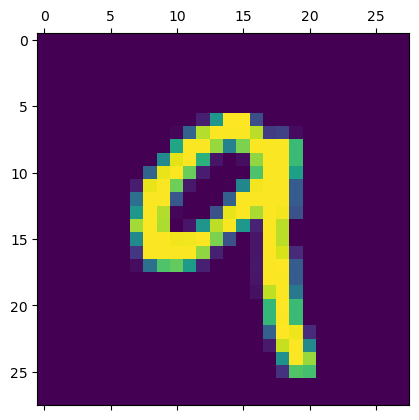

In [10]:
plt.matshow(x_train[110])

In [11]:
y_train[110]

9

In [12]:
28*28

784

In [13]:
len(x_train)

60000

In [31]:
import numpy as np

label_counts = np.bincount(y_train)

for label, count in enumerate(label_counts):
    print(f"Label {label}: {count}")


Label 0: 5923
Label 1: 6742
Label 2: 5958
Label 3: 6131
Label 4: 5842
Label 5: 5421
Label 6: 5918
Label 7: 6265
Label 8: 5851
Label 9: 5949


In [ ]:
y

In [14]:
x_train_flattened = x_train.reshape(len(x_train),28*28) # 784 which is the pixcels of the image
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [15]:
x_train_flattened.shape

(60000, 784)

In [16]:
x_test_flattened.shape

(10000, 784)

In [17]:
model = keras.Sequential()
model.add(Dense(128, input_shape=(x_train_flattened.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6871 - loss: 3.3030
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9193 - loss: 0.3023
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9466 - loss: 0.1913
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9595 - loss: 0.1434
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1260


In [20]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0941 - loss: 2.3965


[2.3960390090942383, 0.09740000218153]

In [21]:
plt.matshow(x_test[42])

ValueError: not enough values to unpack (expected 2, got 1)

In [22]:
num = model.predict(x_test_flattened[42].reshape(1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [23]:
num

array([[0.09020772, 0.08109599, 0.09311734, 0.07206046, 0.09985806,
        0.12032399, 0.05496494, 0.06718396, 0.24176538, 0.07942209]],
      dtype=float32)

In [24]:
np.argmax(num)

8

In [25]:
import pickle
# pickle.dump(model,open('model.pkl','wb'))

In [27]:
model.save("mnist_model.h5")

In [6]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("mnist_model.h5")
print("Model loaded successfully")
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
# Preprocess test data (same as training)
x_test = x_test.reshape(-1, 784) / 255.0


# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

# Show a few predictions
for i in range(5):
    print(f"Predicted: {y_pred[i]} | Actual: {y_test[i]}")

# Single sample prediction (optional)
sample = x_test[0].reshape(1, 784)
single_pred = model.predict(sample)
print("Single prediction:", np.argmax(single_pred))


Model loaded successfully
Test Loss: 2.3773467540740967
Test Accuracy: 0.10320000350475311
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
Predicted: 2 | Actual: 7
Predicted: 2 | Actual: 2
Predicted: 2 | Actual: 1
Predicted: 2 | Actual: 0
Predicted: 2 | Actual: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Single prediction: 2
